**Aim:** Develop predictive models to estimate the total amount paid by travelers for taxi rides.

**Dataset Overview**
This dataset presents an opportunity to construct predictive models aimed at estimating the total amount paid by travelers for taxi journeys. With access to a training set containing the target variable 'total_amount' along with various informative features.

**Data Files**
The dataset is composed of the following files:

train.csv: The training set, which includes the target variable 'total_amount' and accompanying feature attributes.

test.csv: The test set, containing similar feature attributes but without the target variable 'total_amount,' as it is the variable to be predicted.

sample_submission.csv: A sample submission file provided in the correct format for competition submissions.

**Columns Description**

The dataset comprises various columns, each offering valuable insights into taxi rides. Notably:

total_amount: The total amount paid by the traveler for the taxi ride.

VendorID: An identifier for taxi vendors.

tpep_pickup_datetime and tpep_dropoff_datetime: Timestamps indicating pickup and dropoff times.

passenger_count: The number of passengers during the ride.

trip_distance: The distance traveled during the trip.

RatecodeID: Rate code for the ride.

store_and_fwd_flag: A flag indicating whether the trip data was stored and forwarded.

PULocationID and DOLocationID: Pickup and dropoff location identifiers.

payment_type: Payment type used for the ride.

Other columns are self-explanatory and contribute to the modeling process.

# Loading the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Read the training data
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# **Necessary Imports**

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# EDA

In [3]:
'''# Create a ProfileReport object
profile = ProfileReport(data)

# Generate the report
profile.to_file("report.html")'''

'# Create a ProfileReport object\nprofile = ProfileReport(data)\n\n# Generate the report\nprofile.to_file("report.html")'

In [4]:
data.shape

(175000, 17)

In [5]:
#Describe the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,168923.0,1.518307,6.514678,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


* From the above we can see that the trip distance ranges from 0 to 1,35,182.06.
* Passager count ranges from 0 to 9.
* The data has 1,75,000 samples and 17 columns, one of them is total_amount.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

* Columns VendorID, PULocationID and DOLocationID take integer values.
* Columns Airport_fee, congestion_surcharge, improvement_surcharge, tolls_amount, tip_amount, extra, passenger_count,trip_distance,RatecodeID and total_amount take float values.
* Columns tpep_pickup_datetime, tpep_dropoff_datetime, payment_type and store_and_fwd_flag take object values.
* tpep_pickup_datetime and tpep_dropoff_datetime should be converted to datetime format. Feature engineering can be used to extract the total trip duration using these columns.

1. The float values can be scaled if necessary.
2. The object values if used need to be encoded.

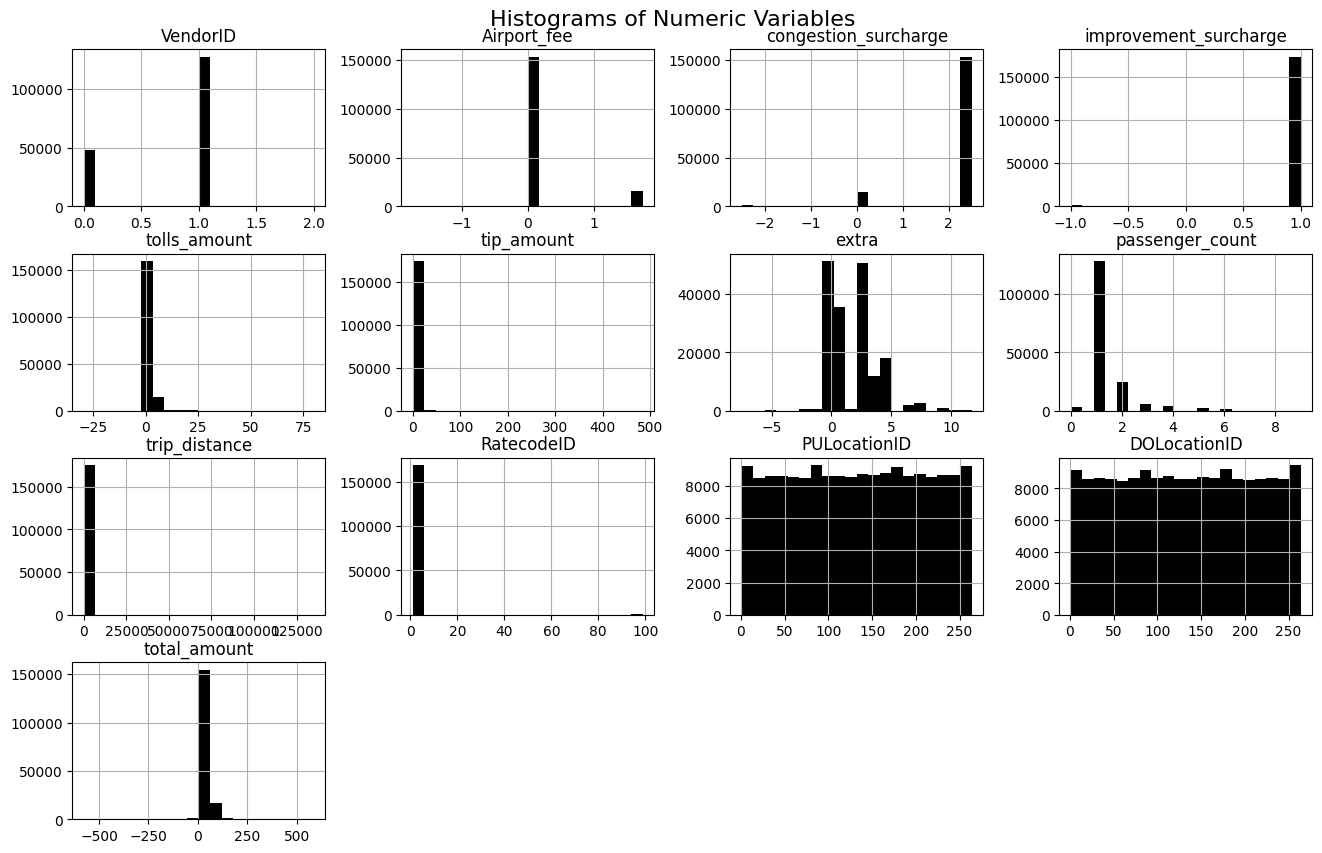

In [7]:
numeric = ['VendorID','Airport_fee', 'congestion_surcharge', 'improvement_surcharge', 'tolls_amount', 'tip_amount', 'extra',
           'passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'total_amount']

# Select only the numeric variables from the DataFrame
numeric_data = data[numeric]

numeric_data.hist(bins=20, figsize=(16, 10),color='black')
plt.suptitle('Histograms of Numeric Variables', y=0.92, size=16)
plt.show()

* PULocationID and DOLocationId are uniformly distrubuted from 0 to 250.
* trip_distance is positively skewed.

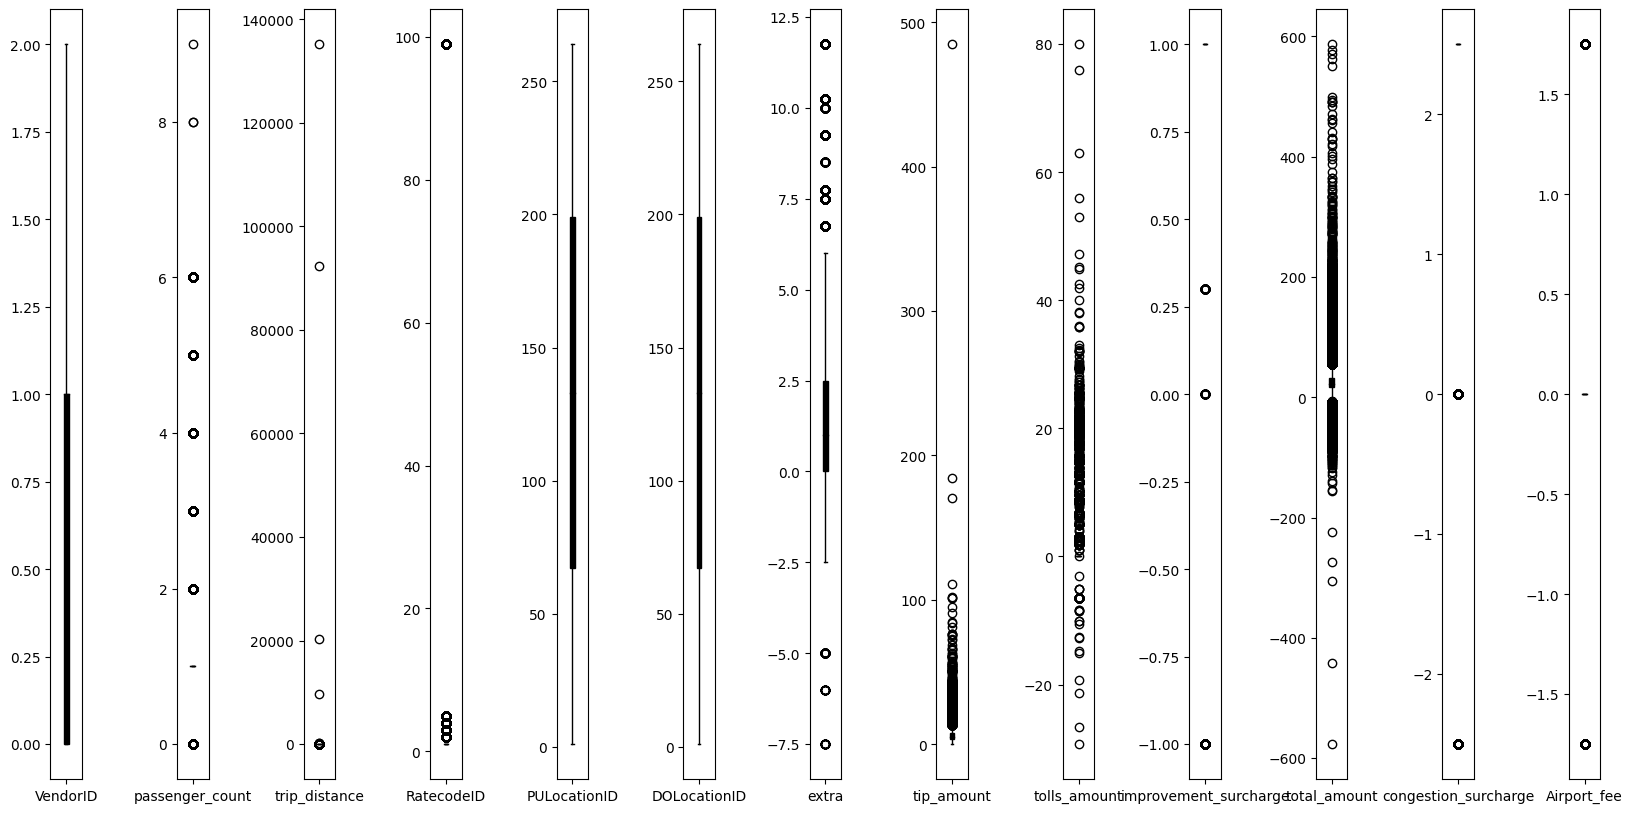

In [8]:
data.plot(kind='box',sharey = False, subplots=True, color='black',figsize=(20,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 3)
plt.show()

1. VendorID:
The majority of trips are provided by VendorID 1.

2. passenger_count:
Most trips have a passenger count of 1.
There are some trips with passenger counts greater than 1, with the maximum being 9.

3. trip_distance:
The average trip distance is around 5.15 miles, but there is a significant variation.
There are some extreme outliers in trip distance, as indicated by the maximum value.

4. RatecodeID:
The majority of trips fall under RatecodeID 1.

5. PULocationID and DOLocationID:
Both PULocationID and DOLocationID show a wide range of values, indicating pickups and drop-offs across different locations.
The distribution is approximately uniform.

6. extra:
The extra charge distribution is positively skewed, with most values concentrated between 0 and 2.5.
There are some negative values, which might be anomalies or errors in the data.

7. tip_amount:
The average tip amount is around 6.13, with a positive skewness.
There are some high outliers in tip amounts, with the maximum value being significantly higher than the third quartile.

8. tolls_amount:
Most trips have zero toll amounts.
The distribution is positively skewed, with some trips incurring toll charges.

9. improvement_surcharge, congestion_surcharge, Airport_fee:
These surcharge and fee columns mostly have values close to their respective fixed amounts, with some variation.
The distributions are relatively uniform.

10. total_amount:
The total amount distribution is positively skewed, with a wide range of values.
There are some high outliers, which contribute to the long right tail of the distribution.

11. congestion_surcharge and Airport_fee (again):
The congestion_surcharge has a fixed value of 2.5 for the majority of trips.
The Airport_fee is mostly concentrated around 0, with some positive values.

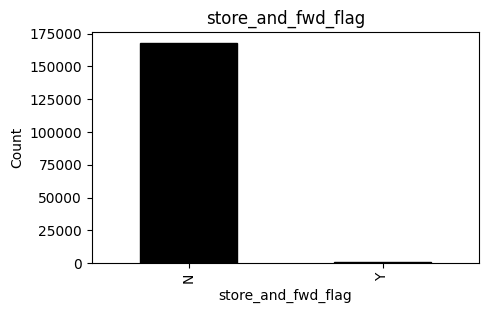

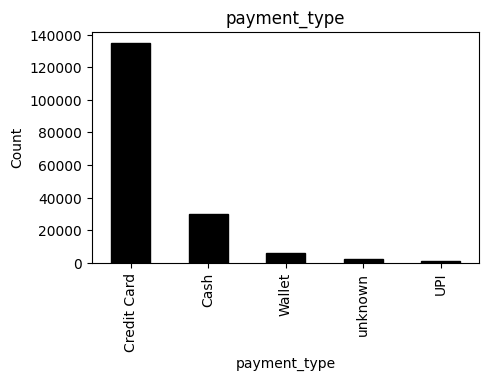

In [9]:
categorical=['store_and_fwd_flag','payment_type']

for column in categorical:
    # Count the occurrences of each category
    category_counts = data[column].value_counts()

    # Plot the bar graph
    category_counts.plot(kind='bar', color='black', edgecolor='black', figsize=(5, 3))
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

* payment_type and store_and_fwd_flag if used need to be encoded.

In [10]:
# Check for missing values in each column
missing_values = data.isnull().any()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values].index

# Print the columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Index(['passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


* Missing values need to be imputed.

# Data Preprocessing

In [11]:
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

#Feature selection
data = data.drop(columns=['PULocationID', 'DOLocationID']) 
data['store_and_fwd_flag'].fillna('N', inplace=True) #Since maximum values of store_and_fwd_flag are N
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate the time difference and convert to minutes
data['trip_duration_minutes'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['trip_duration_minutes'] = data['trip_duration_minutes'].abs().astype(float)

# Define features and target
X = data.drop(columns=['total_amount','tpep_pickup_datetime','tpep_dropoff_datetime'])
y = data['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define columns to be imputed, one-hot encoded
impute_cols = ['Airport_fee', 'congestion_surcharge', 'passenger_count', 'RatecodeID']
one_hot_encode_cols = ['payment_type','store_and_fwd_flag']
numeric_scaler_cols = [ 'trip_distance','trip_duration_minutes', 'Airport_fee', 'congestion_surcharge', 'improvement_surcharge', 'tolls_amount', 'tip_amount', 'extra']

In [13]:
# Create transformers
imputer = SimpleImputer(strategy='most_frequent') #Since all the columns that require imputation take certain specific values only. Taking mean wouldn't make sense.
one_hot_encoder = OneHotEncoder()
numeric_scaler = MinMaxScaler()

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('impute', imputer, impute_cols),
        ('one_hot_encode', one_hot_encoder, one_hot_encode_cols),
        ('numeric_scaler', numeric_scaler, numeric_scaler_cols),
    ],
    remainder='passthrough'
)

# XGBoost Model

In [14]:
# Create XGBoost model with specified hyperparameters
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, 
                             min_child_weight=1,
                             gamma=0,
                             subsample=1,
                             colsample_bytree=1,
                             scale_pos_weight=2,
                             random_state=42)
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score = pipeline.score(X_test, y_test)
print(f"Test R^2 score: {test_score}")

Test R^2 score: 0.9623147176646489


# Hyperparameter Tuning for XGBoost Model

In [15]:
'''# Create XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', 
                             min_child_weight=1,
                             gamma=0,
                             subsample=1,
                             scale_pos_weight=2,
                             random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])
# Define hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],'model__learning_rate': [0.01, 0.1, 0.2]}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters: ", grid_search.best_params_)'''

'# Create XGBoost model\nxgb = XGBRegressor(objective=\'reg:squarederror\', \n                             min_child_weight=1,\n                             gamma=0,\n                             subsample=1,\n                             scale_pos_weight=2,\n                             random_state=42)\n\npipeline = Pipeline(steps=[\n    (\'preprocessor\', preprocessor),\n    (\'model\', xgb)\n])\n# Define hyperparameter grid\nparam_grid = {\n    \'model__n_estimators\': [100, 200, 300],\'model__learning_rate\': [0.01, 0.1, 0.2]}\n\n# Perform grid search\ngrid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n\n# Print best parameters and best score\nprint("Best Parameters: ", grid_search.best_params_)'

# Lightgbm Model

In [16]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='goss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score = pipeline.score(X_test, y_test)
print(f"Test R^2 score: {test_score}")

Test R^2 score: 0.9418451397191534


# Bagging Regressor

In [17]:
# Replace missing values in selected columns
data['store_and_fwd_flag'].fillna('N', inplace=True)
data['RatecodeID'].fillna(1, inplace=True)
data['passenger_count'].fillna(1, inplace=True)
data['Airport_fee'].fillna(0, inplace=True)
data['congestion_surcharge'].fillna(2.5, inplace=True)

X = data.drop(columns=['total_amount','tpep_pickup_datetime','tpep_dropoff_datetime'])
y = data['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor with specified hyperparameters
best_decision_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=1)

# Create a Bagging Regressor with the Decision Tree as the base estimator
bagging_model = BaggingRegressor(base_estimator=best_decision_tree, n_estimators=10, random_state=42)

# Create a pipeline with preprocessing and the Bagging Regressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', bagging_model)
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score = pipeline.score(X_test, y_test)
print(f"Test R^2 score: {test_score}")

Test R^2 score: 0.9271387924938139


# Final Pipeline using XGBoost Regressor after hyperparameter tuning

In [18]:
# Create XGBoost model with specified hyperparameters
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, 
                             min_child_weight=1,
                             gamma=0,
                             subsample=1,
                             colsample_bytree=1,
                             scale_pos_weight=2,
                             random_state=42)
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score = pipeline.score(X_test, y_test)
print(f"Test R^2 score: {test_score}")

Test R^2 score: 0.9607825483228324


# Working With the Test Data

In [19]:
# Load the test dataset
data=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

# Fill missing values in the 'store_and_fwd_flag' column with 'N'
data['store_and_fwd_flag'].fillna('N', inplace=True)


data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate the time difference and convert to minutes
data['trip_duration_minutes'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['trip_duration_minutes'] = data['trip_duration_minutes'].abs().astype(float)

# Drop unnecessary columns
data = data.drop(columns=['PULocationID', 'DOLocationID','tpep_pickup_datetime','tpep_dropoff_datetime'])

# Create a new feature 'trip_duration_minutes' with missing values
data['trip_duration_minutes'] = np.nan

# Make predictions using the pre-trained pipeline
y_pred = pipeline.predict(data)

# Prepare the submission DataFrame
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred

# Save the submission to a CSV file
submission.to_csv('submission.csv',index=False)

# Conclusion

In this machine learning project, I embarked on a comprehensive journey to predict taxi fares based on various features. I began by loading the dataset and conducting initial exploratory data analysis to understand the characteristics of the data. The preprocessing phase involved handling missing values, transforming datetime columns, and engineering a new feature, 'trip_duration_minutes,' capturing the duration of each taxi trip.

The model evaluation process involved splitting the dataset into training and testing sets, fitting the pipeline to the training data, and assessing the model's performance on the test data using the R^2 score.

Overall, this iterative and systematic approach forms the foundation for building robust and accurate machine learning models.